# Práctica 3: extracción de caracteristicas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

## Datos del porcentaje de defunciones por suicidio según sexo

### Analisis de componentes principales

In [31]:
path = 'Porcentaje de defunciones por suicidio segun sexo.csv'
all_var = ['Entidad Federativa','Sexo','2010','2011','2012','2013','2014','2015','2016','2017','2018']
carac = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
obj = ['Sexo']
df = pd.read_csv(path, names=all_var)
df.head()

,Entidad Federativa,Sexo,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aguascalientes,Hombres,9.5,17.5,22.2,22.3,19.7,23.9,22.7,23.4,22.2
1,Aguascalientes,Mujeres,6.7,11.9,13.4,13.7,16.8,14.0,14.7,16.8,14.0
2,Baja California,Hombres,3.7,7.7,6.1,5.7,8.9,6.9,6.5,5.6,5.2
3,Baja California,Mujeres,3.5,4.0,4.0,5.5,7.0,4.5,6.1,3.8,5.6
4,Baja California Sur,Hombres,16.5,9.6,14.2,15.4,17.4,12.7,11.3,5.0,12.4


Antes de hacer el PCA debemos escalar los datos.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[carac]),columns=carac)
df_sc.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.299180,0.673729,1.000000,0.909502,0.780269,0.949153,0.814672,0.947598,0.770677
1,0.184426,0.436441,0.568627,0.520362,0.650224,0.529661,0.505792,0.659389,0.462406
2,0.061475,0.258475,0.210784,0.158371,0.295964,0.228814,0.189189,0.170306,0.131579
3,0.053279,0.101695,0.107843,0.149321,0.210762,0.127119,0.173745,0.091703,0.146617
4,0.586066,0.338983,0.607843,0.597285,0.677130,0.474576,0.374517,0.144105,0.402256


In [15]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[carac]),columns=carac)
df_pca.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,32.723845,-7.792979,3.875021,3.840625,-2.744627,0.542875,-0.442981,-2.123199,1.071797
1,11.976944,-4.699373,2.947992,-0.425040,-0.651861,1.164189,-3.166124,-1.368421,0.974079
2,-10.007942,0.841476,2.134090,-1.042592,-1.565784,0.241149,-0.952096,0.908870,1.095359
3,-14.137306,0.061344,1.151146,0.555411,1.502926,0.173070,-0.446984,1.104472,0.631751
4,9.135984,8.110569,1.416848,1.144953,6.041697,3.121624,2.543002,-1.002792,2.364029


In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.81859746, 0.06460289, 0.04284981, 0.02018259, 0.01905228,
       0.01194966, 0.00955412, 0.00777405, 0.00543714])

Expliquemos lo anterior, el primer componente tiene una variacion de 81\%, el segundo componente 6.4\%, el tercer componente 4.2\%, el cuarto componente 2.01\% los demas componentes tienen una variacion menor al 1%. Con lo anterior podemos decir que la informacion es captada por el primer y segundo componente en su mayoria e incluso podriamos incluir al tercer componente.

In [20]:
df_pca['obj'] = df[obj]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PCA9','obj']
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PCA9,obj
0,32.723845,-7.792979,3.875021,3.840625,-2.744627,0.542875,-0.442981,-2.123199,1.071797,Hombres
1,11.976944,-4.699373,2.947992,-0.425040,-0.651861,1.164189,-3.166124,-1.368421,0.974079,Mujeres
2,-10.007942,0.841476,2.134090,-1.042592,-1.565784,0.241149,-0.952096,0.908870,1.095359,Hombres
3,-14.137306,0.061344,1.151146,0.555411,1.502926,0.173070,-0.446984,1.104472,0.631751,Mujeres
4,9.135984,8.110569,1.416848,1.144953,6.041697,3.121624,2.543002,-1.002792,2.364029,Hombres


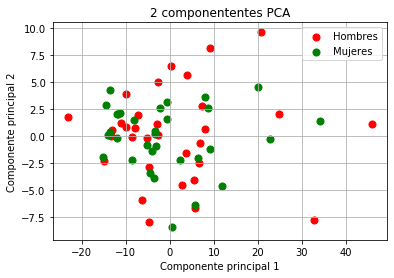

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 2') 
ax.set_title('2 componententes PCA') 
objetivos = ['Hombres', 'Mujeres']
colores = ['r', 'g']

for obj, color in zip(objetivos,colores):
    indicesToKeep = df_pca['obj'] == obj
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(objetivos)
ax.grid()

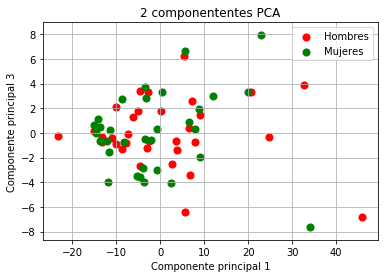

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos = ['Hombres', 'Mujeres']
colores = ['r', 'g']

for obj, color in zip(objetivos,colores):
    indicesToKeep = df_pca['obj'] == obj
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos)
ax.grid()

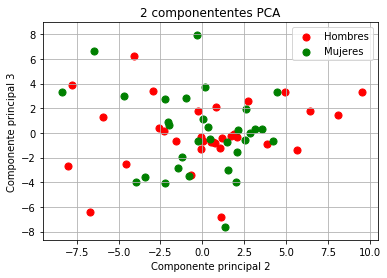

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 2') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos = ['Hombres', 'Mujeres']
colores = ['r', 'g']

for obj, color in zip(objetivos,colores):
    indicesToKeep = df_pca['obj'] == obj
    ax.scatter(df_pca.loc[indicesToKeep, 'PC2']
    , df_pca.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos)
ax.grid()

## Datos de la tasa de abandono escolar

### Analisis de componentes principales

In [59]:
path1 = 'Tasa de abandono 2010-2018.csv'
all_var1 = ['Entidad Federativa','Nivel Educativo','2000/2001','2005/2006','2010/2011','2015/1016','2018/2019']
carac1 = ['2000/2001','2005/2006','2010/2011','2015/1016','2018/2019']
obj1 = ['Nivel Educativo']
df1 = pd.read_csv(path1, names=all_var1)
df1.head()

,Entidad Federativa,Nivel Educativo,2000/2001,2005/2006,2010/2011,2015/1016,2018/2019
0,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.1
1,Aguascalientes,Secundaria,8.0,8.2,4.5,5.9,5.8
2,Aguascalientes,Media superior,16.6,15.6,15.2,13.3,12.4
3,Aguascalientes,Superior,3.8,5.8,7.3,6.3,7.5
4,Baja California,Primaria,1.3,1.2,0.2,-0.2,0.4


In [60]:
scaler = MinMaxScaler()
df_sc1 = pd.DataFrame(scaler.fit_transform(df1[carac1]),columns=carac1)
df_sc1.head()

,2000/2001,2005/2006,2010/2011,2015/1016,2018/2019
0,0.112033,0.097458,0.140794,0.080357,0.034314
1,0.381743,0.377119,0.310469,0.334821,0.313725
2,0.738589,0.690678,0.696751,0.665179,0.637255
3,0.207469,0.275424,0.411552,0.352679,0.397059
4,0.103734,0.080508,0.155235,0.062500,0.049020


In [62]:
pca1 = PCA()
df1_pca1 = pd.DataFrame(pca1.fit_transform(df1[carac1]),columns=carac1)
df1_pca1.head()

,2000/2001,2005/2006,2010/2011,2015/1016,2018/2019
0,-15.625375,-0.049827,-0.374606,-0.677257,0.225668
1,-2.560925,-0.140863,-1.148795,-0.444093,1.465889
2,15.702106,-0.229804,0.430393,0.345318,-0.740182
3,-3.597341,4.158559,2.092101,0.935294,-0.058808
4,-15.784841,0.024031,0.283774,-0.307350,0.131750


In [63]:
explained_variance1 = pca1.explained_variance_ratio_
explained_variance1

array([0.91060251, 0.03734383, 0.0197195 , 0.01884953, 0.01348463])

El primer componente tiene una variacion de 91%, el segundo componente 3.7%, el tercer componente 1.9%, los demas componentes tienen una variacion menor al 1.9%. Con lo anterior podemos decir que la informacion es captada por el primer y segundo componente.

In [64]:
df1_pca1['obj1'] = df1[obj1]
df1_pca1.columns = ['PC1', 'PC2','PC3','PC4','PC5','obj1']
df1_pca1.head()

,PC1,PC2,PC3,PC4,PC5,obj1
0,-15.625375,-0.049827,-0.374606,-0.677257,0.225668,Primaria
1,-2.560925,-0.140863,-1.148795,-0.444093,1.465889,Secundaria
2,15.702106,-0.229804,0.430393,0.345318,-0.740182,Media superior
3,-3.597341,4.158559,2.092101,0.935294,-0.058808,Superior
4,-15.784841,0.024031,0.283774,-0.307350,0.131750,Primaria


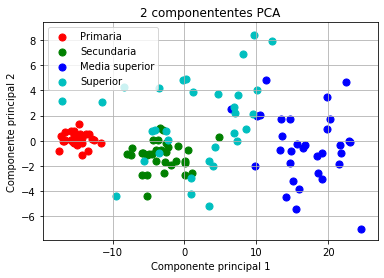

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 2') 
ax.set_title('2 componententes PCA') 
objetivos1 = ['Primaria','Secundaria','Media superior','Superior']
colores1 = ['r', 'g','b','c']

for obj1, color in zip(objetivos1,colores1):
    indicesToKeep = df1_pca1['obj1'] == obj1
    ax.scatter(df1_pca1.loc[indicesToKeep, 'PC1']
    , df1_pca1.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(objetivos1)
ax.grid()

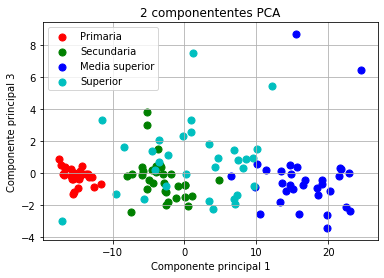

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos1 = ['Primaria','Secundaria','Media superior','Superior']
colores1 = ['r', 'g','b','c']

for obj1, color in zip(objetivos1,colores1):
    indicesToKeep = df1_pca1['obj1'] == obj1
    ax.scatter(df1_pca1.loc[indicesToKeep, 'PC1']
    , df1_pca1.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos1)
ax.grid()

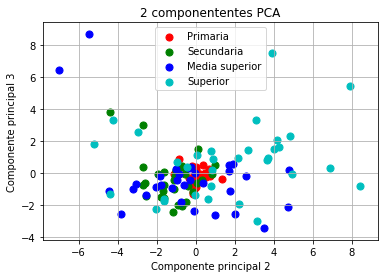

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 2') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos1 = ['Primaria','Secundaria','Media superior','Superior']
colores1 = ['r', 'g','b','c']

for obj1, color in zip(objetivos1,colores1):
    indicesToKeep = df1_pca1['obj1'] == obj1
    ax.scatter(df1_pca1.loc[indicesToKeep, 'PC2']
    , df1_pca1.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos1)
ax.grid()

## Datos de la tasa de casos nuevos de depresión y anorexia

### Analisis de componentes principales

In [72]:
path2 = 'Tasa de casos nuevos de enfermedad mental.csv'
all_var2 = ['Entidad Federativa','Enfermadad Mental','2014','2015','2016','2017','2018']
carac2 = ['2014','2015','2016','2017','2018']
obj2 = ['Enfermadad Mental']
df2 = pd.read_csv(path2, names=all_var2)
df2.head()

,Entidad Federativa,Enfermadad Mental,2014,2015,2016,2017,2018
0,Aguascalientes,Depresión,78.81,170.62,239.13,225.13,107.32
1,Aguascalientes,Anorexia y bulimia,1.34,1.71,2.91,2.35,1.58
2,Baja California,Depresión,80.46,79.93,82.86,107.68,144.81
3,Baja California,Anorexia y bulimia,6.38,5.02,3.90,4.49,5.11
4,Baja California Sur,Depresión,117.67,117.55,104.97,133.85,112.67


In [73]:
scaler = MinMaxScaler()
df_sc2 = pd.DataFrame(scaler.fit_transform(df2[carac2]),columns=carac2)
df_sc2.head()

,2014,2015,2016,2017,2018
0,0.529246,0.648790,0.917822,0.837038,0.361631
1,0.008999,0.004955,0.010296,0.006080,0.003422
2,0.540326,0.303107,0.317454,0.398956,0.488634
3,0.042845,0.017572,0.014100,0.014062,0.015380
4,0.790209,0.446503,0.402397,0.496568,0.379755


In [74]:
pca2 = PCA()
df2_pca2 = pd.DataFrame(pca2.fit_transform(df2[carac2]),columns=carac2)
df2_pca2.head()

,2014,2015,2016,2017,2018
0,266.697130,114.243273,-0.042726,-18.683319,19.472695
1,-104.587227,2.088871,-1.212675,1.176036,1.653968
2,115.485323,-41.758210,-5.612493,-1.209011,1.869652
3,-98.331194,-0.319155,1.738880,1.769552,1.039292
4,150.022197,-5.607064,43.709380,-5.638716,-5.518087


In [75]:
explained_variance2 = pca2.explained_variance_ratio_
explained_variance2

array([0.95715401, 0.02310753, 0.01225311, 0.00543751, 0.00204784])

El primer componente tiene una variacion de 95%, el segundo componente 2.3%, el tercer componente 1.2%, los demas componentes tienen una variacion menor al 1%. Con lo anterior podemos decir que la informacion es captada por el primer y segundo componente.

In [77]:
df2_pca2['obj2'] = df2[obj2]
df2_pca2.columns = ['PC1', 'PC2','PC3','PC4','PC5','obj2']
df2_pca2.head()

,PC1,PC2,PC3,PC4,PC5,obj2
0,266.697130,114.243273,-0.042726,-18.683319,19.472695,Depresión
1,-104.587227,2.088871,-1.212675,1.176036,1.653968,Anorexia y bulimia
2,115.485323,-41.758210,-5.612493,-1.209011,1.869652,Depresión
3,-98.331194,-0.319155,1.738880,1.769552,1.039292,Anorexia y bulimia
4,150.022197,-5.607064,43.709380,-5.638716,-5.518087,Depresión


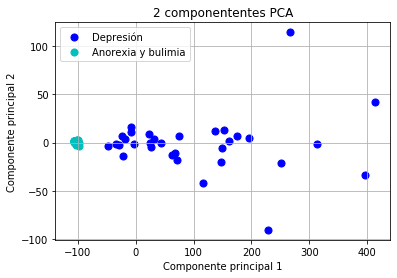

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 2') 
ax.set_title('2 componententes PCA') 
objetivos2 = ['Depresión','Anorexia y bulimia']
colores2 = ['b','c']

for obj2, color in zip(objetivos2,colores2):
    indicesToKeep = df2_pca2['obj2'] == obj2
    ax.scatter(df2_pca2.loc[indicesToKeep, 'PC1']
    , df2_pca2.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(objetivos2)
ax.grid()

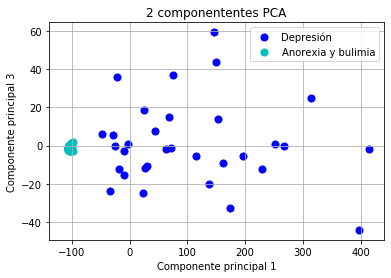

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos2 = ['Depresión','Anorexia y bulimia']
colores2 = ['b','c']

for obj2, color in zip(objetivos2,colores2):
    indicesToKeep = df2_pca2['obj2'] == obj2
    ax.scatter(df2_pca2.loc[indicesToKeep, 'PC1']
    , df2_pca2.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos2)
ax.grid()

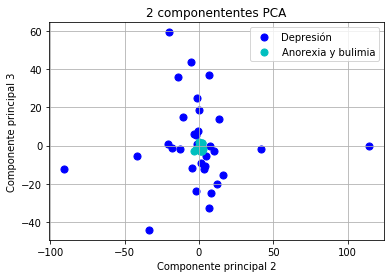

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 2') 
ax.set_ylabel('Componente principal 3') 
ax.set_title('2 componententes PCA') 
objetivos2 = ['Depresión','Anorexia y bulimia']
colores2 = ['b','c']

for obj2, color in zip(objetivos2,colores2):
    indicesToKeep = df2_pca2['obj2'] == obj2
    ax.scatter(df2_pca2.loc[indicesToKeep, 'PC2']
    , df2_pca2.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(objetivos2)
ax.grid()